# DAT257x: Reinforcement Learning Explained

## Lab 5: Temporal Difference Learning

### Exercise 5.2: SARSA Agent

In [3]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 
    
from lib.envs.simple_rooms import SimpleRoomsEnv
from lib.envs.windy_gridworld import WindyGridworldEnv
from lib.envs.cliff_walking import CliffWalkingEnv
from lib.simulation import Experiment

In [4]:
class Agent(object):  
        
    def __init__(self, actions):
        self.actions = actions
        self.num_actions = len(actions)

    def act(self, state):
        raise NotImplementedError

In [5]:
class SarsaAgent(Agent):
    
    def __init__(self, actions, epsilon=0.01, alpha=0.5, gamma=1):
        super(SarsaAgent, self).__init__(actions)
        
        ## TODO 1
        ## Initialize empty dictionary here
        ## In addition, initialize the value of epsilon, alpha and gamma
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.qsa = {}
        
    def stateToString(self, state):
        mystring = ""
        if np.isscalar(state):
            mystring = str(state)
        else:
            for digit in state:
                mystring += str(digit)
        return mystring    
    
    def act(self, state):
        stateStr = self.stateToString(state)    
        action = np.random.choice(self.num_actions) 
        if stateStr not in self.qsa:
            self.qsa[stateStr] = np.zeros(self.num_actions)
            
        ## TODO 2
        ## Implement epsilon greedy policy here
        choice = np.random.binomial(1, self.epsilon)
        if choice == 0:
            idx = np.where(self.qsa[stateStr] == np.max(self.qsa[stateStr]))
            action = np.random.choice(idx[0])
        return action

    def learn(self, state1, action1, reward, state2, action2):
        state1Str = self.stateToString(state1)
        state2Str = self.stateToString(state2)
                    
        ra2 = 0
        if state2Str in self.qsa:
            ra2 = self.qsa[state2Str][action2]
        ## TODO 3
        ## Implement the sarsa update here
        self.qsa[state1Str][action1] = self.qsa[state1Str][action1] + self.alpha * (reward + self.gamma * ra2 - self.qsa[state1Str][action1])
#         print(state1Str, action1, self.qsa[state1Str])
#         print(state2Str, action2, self.qsa[state2Str])
#         print("==========================================================s

In [21]:
from collections import defaultdict
class SarsaAgent(Agent):
    
    def __init__(self, actions, epsilon=0.8, alpha=0.5, gamma=1):
        super(SarsaAgent, self).__init__(actions)
        
        ## TODO 1
        ## Initialize empty dictionary here
        ## In addition, initialize the value of epsilon, alpha and gamma
        
        
        self.default_action_values={i:0.0 for i in range(self.num_actions)}
        self.Q={}
        self.epsilon=epsilon
        self.gamma=gamma
        self.alpha=alpha
        self.decrement=0.005
        
        
    def stateToString(self, state):
        mystring = ""
        if np.isscalar(state):
            mystring = str(state)
        else:
            for digit in state:
                mystring += str(digit)
        return mystring    
    
    def act(self, state):
        stateStr = self.stateToString(state)    
        action = np.random.choice(self.num_actions) 
        if stateStr not in self.Q:
            self.Q[stateStr] = np.zeros(self.num_actions)
            
        ## TODO 2
        ## Implement epsilon greedy policy here
        choice = np.random.binomial(1, self.epsilon)
        if choice == 0:
            idx = np.where(self.Q[stateStr] == np.max(self.Q[stateStr]))
            action = np.random.choice(idx[0])
        if self.epsilon>0.01:
            self.epsilon-=self.decrement
        return action
    


    def learn(self, state1, action1, reward, state2, action2):
        state1Str = self.stateToString(state1)
        state2Str = self.stateToString(state2)
        
        ## TODO 3
        ## Implement the sarsa update here
        
        """
        SARSA Update
        Q(s,a) <- Q(s,a) + alpha * (reward + gamma * Q(s',a') - Q(s,a))
        or
        Q(s,a) <- Q(s,a) + alpha * (td_target - Q(s,a))
        or
        Q(s,a) <- Q(s,a) + alpha * td_delta
        """
        
        if state2Str not in self.Q:
            self.Q[state2Str]=np.zeros((self.num_actions,))
        
        td_target = reward + self.gamma*self.Q[state2Str][action2]
        td_error= td_target - self.Q[state1Str][action1]
        
        self.Q[state1Str][action1] += self.alpha * td_error

<IPython.core.display.Javascript object>


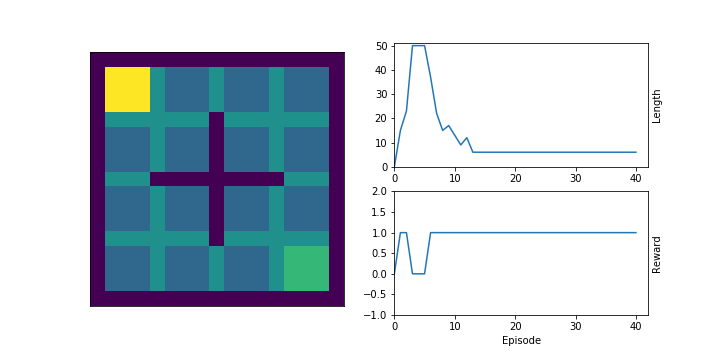

<IPython.core.display.Javascript object>


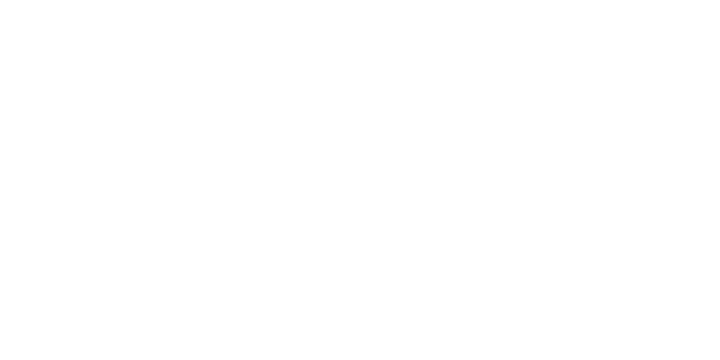

In [31]:
interactive = True
%matplotlib nbagg
env = SimpleRoomsEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(40, interactive)

In [8]:
len(agent.Q.items())

15

<Figure size 720x360 with 0 Axes>

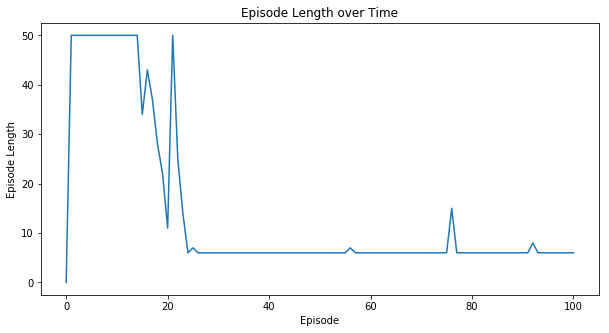

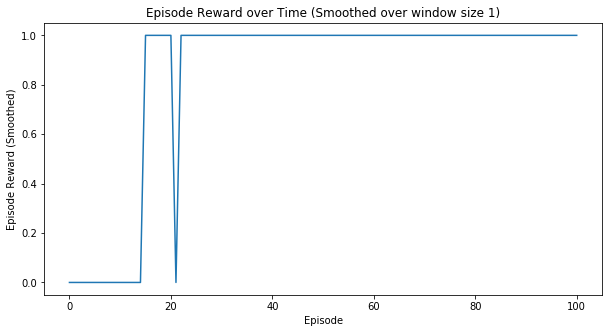

0.009999999999999402


In [24]:
interactive = False
%matplotlib inline
env = SimpleRoomsEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(100, interactive)
print(agent.epsilon)

<IPython.core.display.Javascript object>


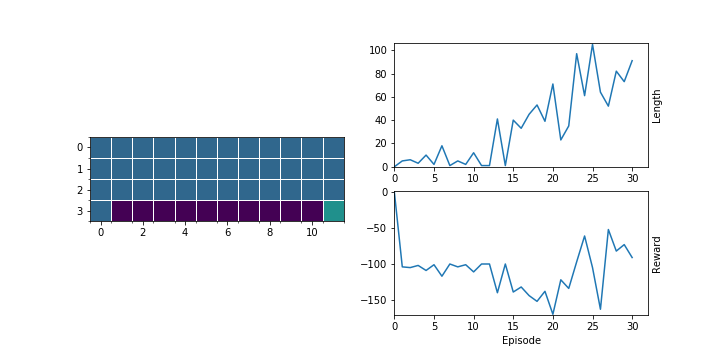

<IPython.core.display.Javascript object>


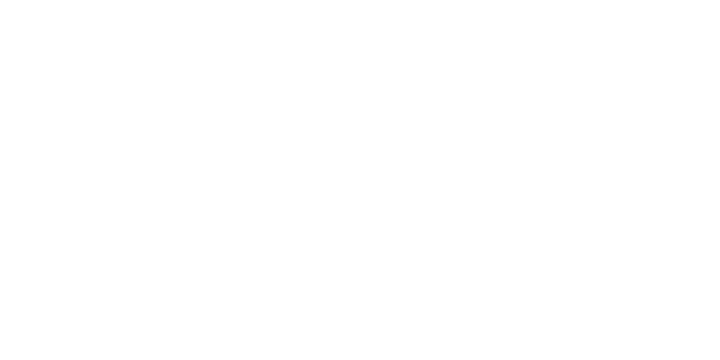

In [28]:
interactive = True
%matplotlib nbagg
env = CliffWalkingEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(30, interactive)

<Figure size 720x360 with 0 Axes>

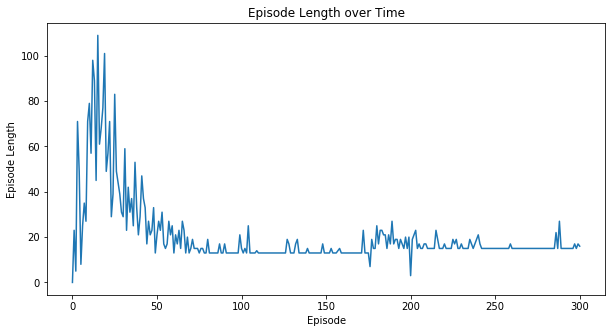

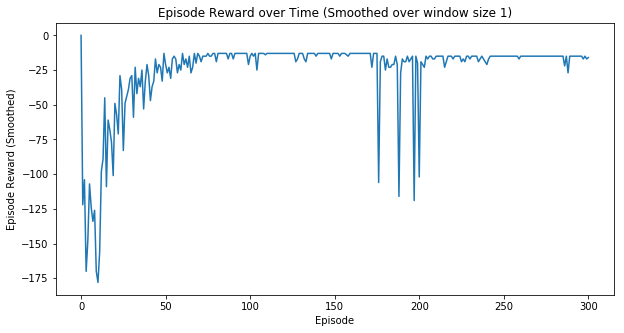

In [30]:
interactive = False
%matplotlib inline
env = CliffWalkingEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(300, interactive)

<Figure size 720x360 with 0 Axes>

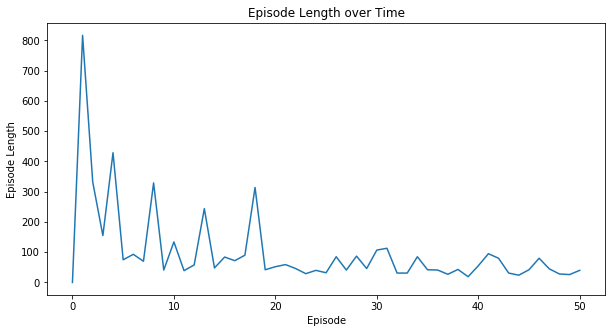

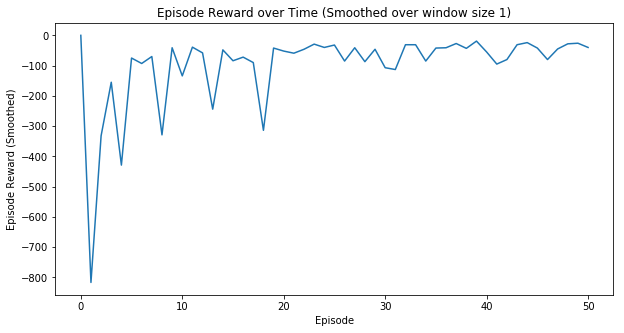

In [14]:
interactive = False
%matplotlib inline
env = WindyGridworldEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(50, interactive)

In [28]:
np.random.binomial(1,0.01)

0

In [20]:
a=np.where(agent.qsa['0.00.00.00.00.00.00.00.00.00.00.00.00.00.01.00.0']==np.max(agent.qsa['0.00.00.00.00.00.00.00.00.00.00.00.00.00.01.00.0']))

In [24]:
np.random.choice(a[0])

1

In [15]:
agent.epsilon

0.09999999999999942